In [1]:
import os
from dotenv import load_dotenv
import nibabel as nib
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec

import seaborn as sns
from nilearn.glm.first_level import make_first_level_design_matrix, run_glm
from nilearn.glm.contrasts import compute_contrast
from nibabel.orientations import aff2axcodes

from utils.psth import map_events_to_frame_times, get_trial_data, normalize_data
from utils.registration import nifit_info, correct4registration, slice2chunk_align

In [2]:
load_dotenv()
base_dir = os.getenv('BASE_DIR')
task_dir = os.path.join(base_dir, 'task_data', 'Grouper_Audiocue_data', 'same_plane')

# Registration

In [2]:
def load_nifti_image(file_path: str):
    """Loads a NIfTI image and returns its data array and affine matrix."""
    img = nib.load(file_path)
    data = img.get_fdata()
    affine = img.affine
    return data, affine, img.header


def process_and_save_image(first_img_path: str, second_img_path: str, output_path: str):
    """Loads the images, applies affine corrections, flips the data, and saves the corrected image."""
    # Load the first image (4D) and the second image (corrected slice)
    first_data, _, _ = load_nifti_image(first_img_path)
    _, second_affine, second_header = load_nifti_image(second_img_path)

    corrected_affine = second_affine.copy()
    corrected_affine[[0, 1]] = corrected_affine[[1, 0]]

    print("Corrected Affine:\n", corrected_affine)
    print(aff2axcodes(corrected_affine))
    
    # reflect z to be positive
    transform_matrix = np.array([[1, 0, 0, 0],
                                [0, 1, 0, 0],
                                [0, 0, -1, 0],
                                [0, 0, 0, 1]])

    transformed_affine = corrected_affine @ transform_matrix

    print(transformed_affine)

    flipped_data = np.flip(first_data, axis=2)

    new_img = nib.Nifti1Image(flipped_data, transformed_affine, second_header)

    nib.save(new_img, output_path)
    print(f"Corrected image saved to {output_path}")

In [4]:
data_dir = os.path.join(task_dir, 'Zion_video_audio_0220')
file1 = os.path.join(data_dir, 'Zion_MarmoAudio_0220_2Dscan_2_fus2D.source.nii')
file2 = os.path.join(data_dir, 'Zion_MarmoAudio_0220_2Dscan_2_fus2D.source.nii.gz')

# correct 2D image for landmark registration
outfile = os.path.join(data_dir, 'Zion_MarmoAudio_0220_2D_corrected.nii.gz')
correct4registration(file2, outfile)

# correct 2D x timepoints for later analysis
output_path = os.path.join(data_dir, 'Zion_MarmoAudio_0220_2D_timepoints_corrected.nii.gz')
process_and_save_image(file1, file2, output_path)


pixdim[1,2,3] should be positive; setting to abs of pixdim values


Corrected Affine:
 [[ 0.          0.40000001  0.         -0.        ]
 [ 0.11        0.          0.         -0.        ]
 [ 0.          0.         -0.09856     0.        ]
 [ 0.          0.          0.          1.        ]]
('A', 'R', 'I')
[[0.         0.40000001 0.         0.        ]
 [0.11       0.         0.         0.        ]
 [0.         0.         0.09856    0.        ]
 [0.         0.         0.         1.        ]]
Corrected Affine:
 [[ 0.          0.40000001  0.         -0.        ]
 [ 0.11        0.          0.         -0.        ]
 [ 0.          0.         -0.09856     0.        ]
 [ 0.          0.          0.          1.        ]]
('A', 'R', 'I')
[[0.         0.40000001 0.         0.        ]
 [0.11       0.         0.         0.        ]
 [0.         0.         0.09856    0.        ]
 [0.         0.         0.         1.        ]]
Corrected image saved to /Users/yibeichen/Desktop/fusi/task_data/Grouper_Audiocue_data/same_plane/Zion_video_audio_0220/Zion_MarmoAudio_0220_2

In [5]:
data_dir = os.path.join(task_dir, 'Zion_video_audio_0220')
file1 = os.path.join(data_dir, 'Zion_Social_Videos_New_0220_2Dscan_1_fus2D.source.nii')
file2 = os.path.join(data_dir, 'Zion_Social_Videos_New_0220_2Dscan_1_fus2D.source.nii.gz')

# correct 2D image for landmark registration
outfile = os.path.join(data_dir, 'Zion_SocialVideos_0220_2D_corrected.nii.gz')
correct4registration(file2, outfile)

# correct 2D x timepoints for later analysis
output_path = os.path.join(data_dir, 'Zion_SocialVideos_0220_timepoints_2D_corrected.nii.gz')
process_and_save_image(file1, file2, output_path)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Corrected Affine:
 [[ 0.          0.40000001  0.         -0.        ]
 [ 0.11        0.          0.         -0.        ]
 [ 0.          0.         -0.09856     0.        ]
 [ 0.          0.          0.          1.        ]]
('A', 'R', 'I')
[[0.         0.40000001 0.         0.        ]
 [0.11       0.         0.         0.        ]
 [0.         0.         0.09856    0.        ]
 [0.         0.         0.         1.        ]]
Corrected Affine:
 [[ 0.          0.40000001  0.         -0.        ]
 [ 0.11        0.          0.         -0.        ]
 [ 0.          0.         -0.09856     0.        ]
 [ 0.          0.          0.          1.        ]]
('A', 'R', 'I')
[[0.         0.40000001 0.         0.        ]
 [0.11       0.         0.         0.        ]
 [0.         0.         0.09856    0.        ]
 [0.         0.         0.         1.        ]]
Corrected image saved to /Users/yibeichen/Desktop/fusi/task_data/Grouper_Audiocue_data/same_plane/Zion_video_audio_0220/Zion_SocialVideos_0220

In [6]:
ref_img_file = os.path.join(base_dir, "chunk2whole_zion", "Zion_3D_corrected-transformed.nii.gz")
moving_img_file = os.path.join(data_dir, 'Zion_SocialVideos_0220_2D_corrected.nii.gz')
transform_file = os.path.join(base_dir, "slice2chunk_zion", "022024", "Transform.h5")

output_file = os.path.join(base_dir, "slice2chunk_zion", "022024", 'Zion_SocialVideos_0220_2D_corrected-transformed.nii.gz')

slice2chunk_align(ref_img_file, moving_img_file, transform_file, output_file)

# GLM

In [5]:
def get_task_idx(mat_data, task_type):
    for i, row in enumerate(mat_data['files_ML']['name']):
        filename = row[0][0]  
        
        if task_type.lower() == "audio" and ("audio" in filename.lower() or "aduio" in filename.lower()):
            return i
        if task_type.lower() == "video" and "video" in filename.lower():
            return i

    return None


def load_data(data_dir, brain_filename, event_filename, task_type='video'):
    brain_file = os.path.join(data_dir, brain_filename)
    event_file = os.path.join(data_dir, event_filename)

    brain_img = nib.load(brain_file)
    brain_data = brain_img.get_fdata()
    print(f"Brain data shape: {brain_data.shape}")

    mat_data = sio.loadmat(event_file)
    i = get_task_idx(mat_data, task_type)
    event_mat = mat_data['mldata'][0][i][0]

    return brain_data, event_mat

def extract_event_info(event_mat, task_type='video'):
    if task_type == 'video':
        condition = event_mat[:]["Block"]
    elif task_type == 'audio':
        condition = event_mat[:]["Condition"]
    else:
        raise ValueError("Invalid task type. Must be 'video' or 'audio'")
    behave_codes = event_mat[:]["BehavioralCodes"]
    absolute_starttime = event_mat[:]["AbsoluteTrialStartTime"]
    return condition, behave_codes, absolute_starttime

def create_design_matrix(condition, behave_codes, absolute_starttime, task_type='video'):
    event_df = pd.DataFrame(columns=['onset', 'trial_type', 'duration', 'end', 'raw_onset'], index=range(len(condition)))

    for i, (c, b, s) in enumerate(zip(condition, behave_codes, absolute_starttime)):
        trial_start = s[0][0] if isinstance(s, np.ndarray) and s.ndim >= 2 else s
        trial_type = c[0][0]
        
        # Check if the specific index matches the condition
        if b[0][0][1][2][0] == 2:
            stimulus_onset = b[0][0][0][2][0] + trial_start
            trial_end = b[0][0][0][3] + trial_start
            
            if task_type == 'video':
                duration = 5
            elif task_type == 'audio':
                duration = 4
            else:
                raise ValueError("Invalid task type. Must be 'video' or 'audio'")
            
            event_df.at[i, 'raw_onset'] = stimulus_onset / 1000
            event_df.at[i, 'trial_type'] = str(trial_type)
            event_df.at[i, 'duration'] = duration
            event_df.at[i, 'end'] = trial_end / 1000
        else:
            # Skip this index if the condition is not met
            print(f"Skipping index {i} due to b[0][0][1][2][0] != 2")
            continue

    event_df['onset'] = event_df['raw_onset'] - absolute_starttime[0][0] / 1000 if isinstance(absolute_starttime[0], np.ndarray) else absolute_starttime[0] / 1000

    return event_df

In [4]:

def normalize_time_series(ts, window_size):
    ts_series = pd.Series(ts)
    moving_avg = ts_series.rolling(window=window_size, min_periods=1).mean().values
    norm_ts_sub = ts - moving_avg
    norm_ts_div = norm_ts_sub / (moving_avg + np.finfo(float).eps)
    return norm_ts_sub, norm_ts_div

def apply_normalization(brain_data, window_size):
    normalized_data_subtract = np.zeros_like(brain_data)
    normalized_data_divide = np.zeros_like(brain_data)

    for i in range(brain_data.shape[0]):
        for j in range(brain_data.shape[2]):
            ts = brain_data[i, 0, j, :]
            norm_ts_sub, norm_ts_div = normalize_time_series(ts, window_size)
            normalized_data_subtract[i, 0, j, :] = norm_ts_sub
            normalized_data_divide[i, 0, j, :] = norm_ts_div

    return normalized_data_subtract, normalized_data_divide

def create_glm_design_matrix(brain_data, event_df, tr=1/2.5, hrf_model='glover', drift_model='polynomial', drift_order=3):
    n_tr = brain_data.shape[-1]
    frame_times = np.arange(n_tr) * tr

    X = make_first_level_design_matrix(
        frame_times=frame_times,
        events=event_df,
        drift_model=drift_model,
        drift_order=drift_order,
        hrf_model=hrf_model
    )

    return X

def update_trial_type(event_df, trial_type):
    event_df1 = event_df.copy()

    if trial_type == "video":
        conditions = {
            "social": ["2", "6"],
            "non-social": []
        }
    elif trial_type == "audio":
        conditions = {
            "non-social": ["1", "9", "10"],
            "social": []
        }
    else:
        raise ValueError("Invalid trial_type. Must be 'video' or 'audio'.")

    # Flatten the conditions and apply the mapping
    for social_type, codes in conditions.items():
        event_df1.loc[event_df['trial_type'].isin(codes), 'trial_type'] = social_type
    
    # Assign the opposite type to all remaining rows
    remaining_type = "social" if trial_type == "audio" else "non-social"
    event_df1.loc[~event_df['trial_type'].isin(conditions["social"] + conditions["non-social"]), 'trial_type'] = remaining_type
    
    return event_df1

def get_contrast_conditions(basic_contrasts):
    contrast_conditions = {}
    contrast_conditions['non-social'] = basic_contrasts['non-social']
    contrast_conditions['social'] = basic_contrasts['social']
    contrast_conditions['social - non-social'] = basic_contrasts['social'] - basic_contrasts['non-social']

    return contrast_conditions

def run_glm_and_compute_contrasts(brain_data, X):
    Y = brain_data.reshape(-1, brain_data.shape[-1])
    labels, estimators = run_glm(Y.T, X.values)

    contrast_matrix = np.eye(X.shape[1])
    basic_contrasts = dict([(column, contrast_matrix[i]) for i, column in enumerate(X.columns)])
    
    # Get the contrast conditions based on the task type
    contrast_conditions = get_contrast_conditions(basic_contrasts)
    
    contrast_results = {}
    for contrast_id, contrast_value in contrast_conditions.items():
        contrast_vector = contrast_value if isinstance(contrast_value, np.ndarray) else basic_contrasts[contrast_value]
        contrast = compute_contrast(labels, estimators, contrast_vector, stat_type='t')
        contrast_results[contrast_id] = contrast.z_score()

    return contrast_results

def plot_contrast(contrast_results, contrast_name, shape=(128, 153), threshold=3, vmin=-15, vmax=15):
    # Get the specific contrast result by key
    if contrast_name not in contrast_results:
        raise ValueError(f"Contrast '{contrast_name}' not found in contrast_results.")
    
    data = contrast_results[contrast_name].reshape(*shape).T
    
    # Create a figure with 2 subplots arranged vertically
    fig, axes = plt.subplots(2, 1, figsize=(5, 9))
    
    # Plot the non-thresholded version
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    sns.heatmap(data, ax=axes[0], cmap="bwr", norm=norm, vmin=vmin, vmax=vmax)
    axes[0].set_title(f"{contrast_name}")
    
    # Apply threshold and plot the thresholded version
    if threshold is not None:
        data_thresholded = np.where((data >= threshold) | (data <= -threshold), data, np.nan)
        sns.heatmap(data_thresholded, mask=np.isnan(data_thresholded), ax=axes[1], cmap="bwr", norm=norm, vmin=vmin, vmax=vmax)
        axes[1].set_title(f"{contrast_name} (z-score > {threshold})")
    
    plt.tight_layout()
    plt.show()

In [6]:
def get_trial_data(event_df, offset_start, offset_end, pixel_data, tr=1/2.5):
    onset_indices = event_df['nearest_index_onset'].values
    indices = [np.arange(i + offset_start, i + offset_end, step=tr) for i in onset_indices]

    slice_length = len(indices[0]) * pixel_data.shape[1]
    trial_data = np.full((len(event_df), slice_length), np.nan)

    for i, idx_range in enumerate(indices):
        valid_idx_range = (idx_range / tr).astype(int)
        valid_idx_range = valid_idx_range[(valid_idx_range >= 0) & (valid_idx_range < pixel_data.shape[0])]
        
        data = pixel_data[valid_idx_range, :].flatten()
        if len(data) > slice_length:
            data = data[:slice_length]
        elif len(data) < slice_length:
            data = np.pad(data, (0, slice_length - len(data)), 'constant', constant_values=np.nan)
        
        trial_data[i, :len(data)] = data

    return trial_data

def proc_pixel(pixel_data, offset_start, offset_end, event_df, tr=1/2.5):
    trial_data = get_trial_data(event_df, offset_start, offset_end, pixel_data, tr)
    normalized_data = []

    for trial_type in event_df['trial_type'].unique():
        data = trial_data[event_df['trial_type'] == trial_type]
        # normalized_data.append(normalize_data(data))
        normalized_data.append(data)
    
    return normalized_data

In [12]:
def get_max_index_and_coordinates(data, shape):
    """
    Reshapes the data and finds the index and coordinates of the maximum value.

    Parameters:
    data (np.ndarray): The contrast result data.
    shape (tuple): The shape to which the data should be reshaped.

    Returns:
    max_index (int): The index of the maximum value in the reshaped data.
    coordinates (tuple): The coordinates of the maximum value in the reshaped data.
    """
    reshaped_data = data.reshape(*shape).T
    max_index = np.argmax(reshaped_data)
    coordinates = np.unravel_index(max_index, reshaped_data.shape)
    return max_index, coordinates

def calculate_frame_times(n_tr, tr):
    """
    Calculates the frame times given the number of TRs and the repetition time.

    Parameters:
    n_tr (int): The number of TRs.
    tr (float): The repetition time.

    Returns:
    frame_times (np.ndarray): The calculated frame times.
    """
    return np.arange(n_tr) * tr

def process_pixel_data(normalized_data, i, j, event_df, offset_start, offset_end):
    """
    Processes pixel data for a specific pixel (i, j).

    Parameters:
    normalized_data (np.ndarray): The normalized data.
    i (int): The x-coordinate of the pixel.
    j (int): The y-coordinate of the pixel.
    event_df (pd.DataFrame): The DataFrame containing event data.
    offset_start (int): The start offset for processing.
    offset_end (int): The end offset for processing.

    Returns:
    normalized_data (np.ndarray): The processed normalized data.
    """
    pixel_data = normalized_data[i, 0, j, :].reshape(-1, 1)
    return proc_pixel(pixel_data, offset_start, offset_end, event_df)

def plot_normalized_data(normalized_data, social_index, non_social_index):
    """
    Plots the normalized data.

    Parameters:
    normalized_data (np.ndarray): The normalized data to plot.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(np.nanmean(normalized_data[social_index], axis=0), label='Social', alpha=0.5, color='green')  
    plt.plot(np.nanmean(normalized_data[non_social_index], axis=0), label='Non-social', alpha=0.5, color='red')
    plt.legend()
    plt.show()

def create_subplot(ax, data, title, cmap='coolwarm', vmin=-0.5, vmax=0.5, ylabel=None):
    """
    Creates a subplot with the given data.

    Parameters:
    ax (matplotlib.axes.Axes): The axes to plot on.
    data (np.ndarray): The data to plot.
    title (str): The title of the plot.
    cmap (str): The colormap to use.
    vmin (float): The minimum value for the colormap.
    vmax (float): The maximum value for the colormap.
    ylabel (str): The label for the y-axis (optional).
    """
    im = ax.imshow(data, cmap=cmap, aspect='auto', vmin=vmin, vmax=vmax)
    ax.set_title(title)
    if ylabel:
        ax.set_ylabel(ylabel)
    return im

def plot_data(normalized_data, social_index, non_social_index, fig_size=(18, 18), vmin=-0.5, vmax=0.5):
    """
    Plots the normalized data using subplots.

    Parameters:
    normalized_data (list of np.ndarray): The data to plot, with two elements.
    fig_size (tuple): The size of the figure.
    vmin (float): The minimum value for the colormap.
    vmax (float): The maximum value for the colormap.
    """
    fig = plt.figure(figsize=fig_size)  # Adjust the figure size to accommodate plots

    # Use GridSpec to control the layout
    gs = GridSpec(1, 2, width_ratios=[1, 1], wspace=0.1)  # Two equal-width plots

    # First plot (Non-social Data)
    ax0 = fig.add_subplot(gs[0])
    im0 = create_subplot(ax0, normalized_data[social_index], title='Social', vmin=vmin, vmax=vmax, ylabel='Trial')

    # Second plot (Social Data)
    ax1 = fig.add_subplot(gs[1])
    im1 = create_subplot(ax1, normalized_data[non_social_index], title='Non-social', vmin=vmin, vmax=vmax)

    # Add colorbars (optional)
    plt.colorbar(im0, ax=ax0, fraction=0.046, pad=0.04)
    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

    plt.show()


## Zion 0220

### Video

In [8]:
data_dir = os.path.join(task_dir, 'Zion_video_audio_0220')
brain_filename = os.path.join(data_dir, 'Zion_Social_Videos_New_0220_2Dscan_1_fus2D.source.nii')
event_filename = os.path.join(data_dir, 'mldata.mat')
task_type = 'video'

brain_data, event_mat = load_data(data_dir, brain_filename, event_filename, task_type)
condition, behave_codes, absolute_starttime = extract_event_info(event_mat, task_type)
event_df = create_design_matrix(condition, behave_codes, absolute_starttime, task_type)
event_df2 = update_trial_type(event_df, task_type)

window_size = 225 
normalized_data_subtract, normalized_data_divide = apply_normalization(brain_data, window_size)

event_df3 = event_df2.dropna(subset=['onset'])

X = create_glm_design_matrix(normalized_data_divide, event_df3, tr=1/2.5, hrf_model='glover', drift_model='polynomial', drift_order=3)
contrast_results = run_glm_and_compute_contrasts(normalized_data_divide, X)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 153, 4500)


/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset, end
  warnings.warn(


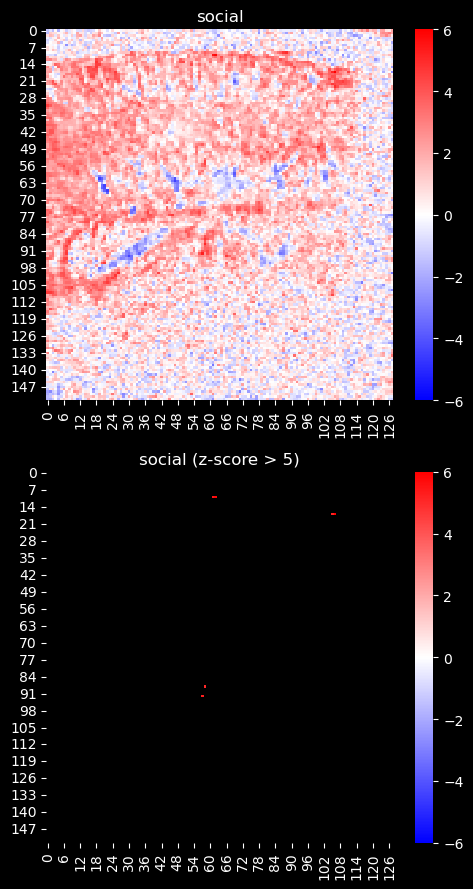

In [9]:
plot_contrast(contrast_results, contrast_name="social", shape=(128, 153), threshold=5, vmin=-6, vmax=6)

In [10]:
max_index, coordinates = get_max_index_and_coordinates(contrast_results['social'], (128, 153))
print("Maximum index:", max_index)
print("Coordinates (x, y):", coordinates)

# Calculate frame times
tr = 1 / 2.5
n_tr = brain_data.shape[-1]
frame_times = calculate_frame_times(n_tr, tr)

# Map events to frame times
event_df4, event_binary_df = map_events_to_frame_times(event_df3, frame_times)

j, i = coordinates
normalized_data = process_pixel_data(normalized_data_divide, i, j, event_df4, offset_start=-2, offset_end=15)
print(event_df4['trial_type'].unique())

Maximum index: 2282
Coordinates (x, y): (17, 106)
['social' 'non-social']


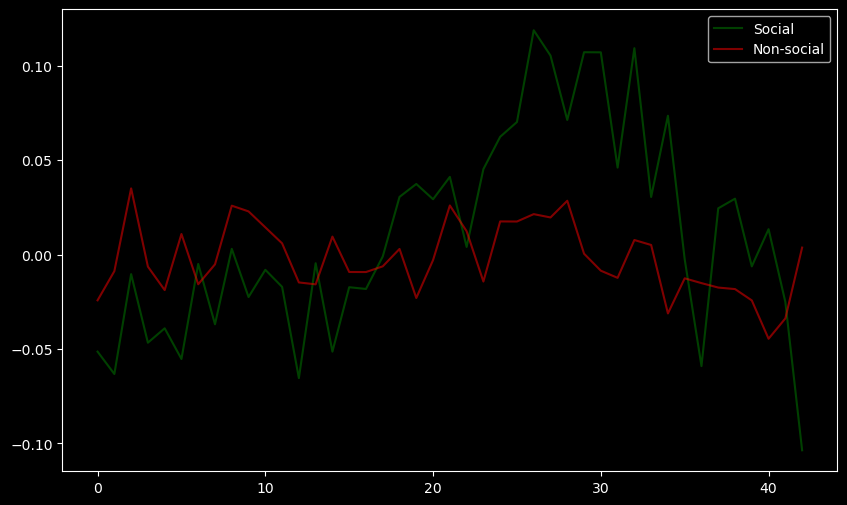

In [11]:
plot_normalized_data(normalized_data, social_index=0, non_social_index=1)

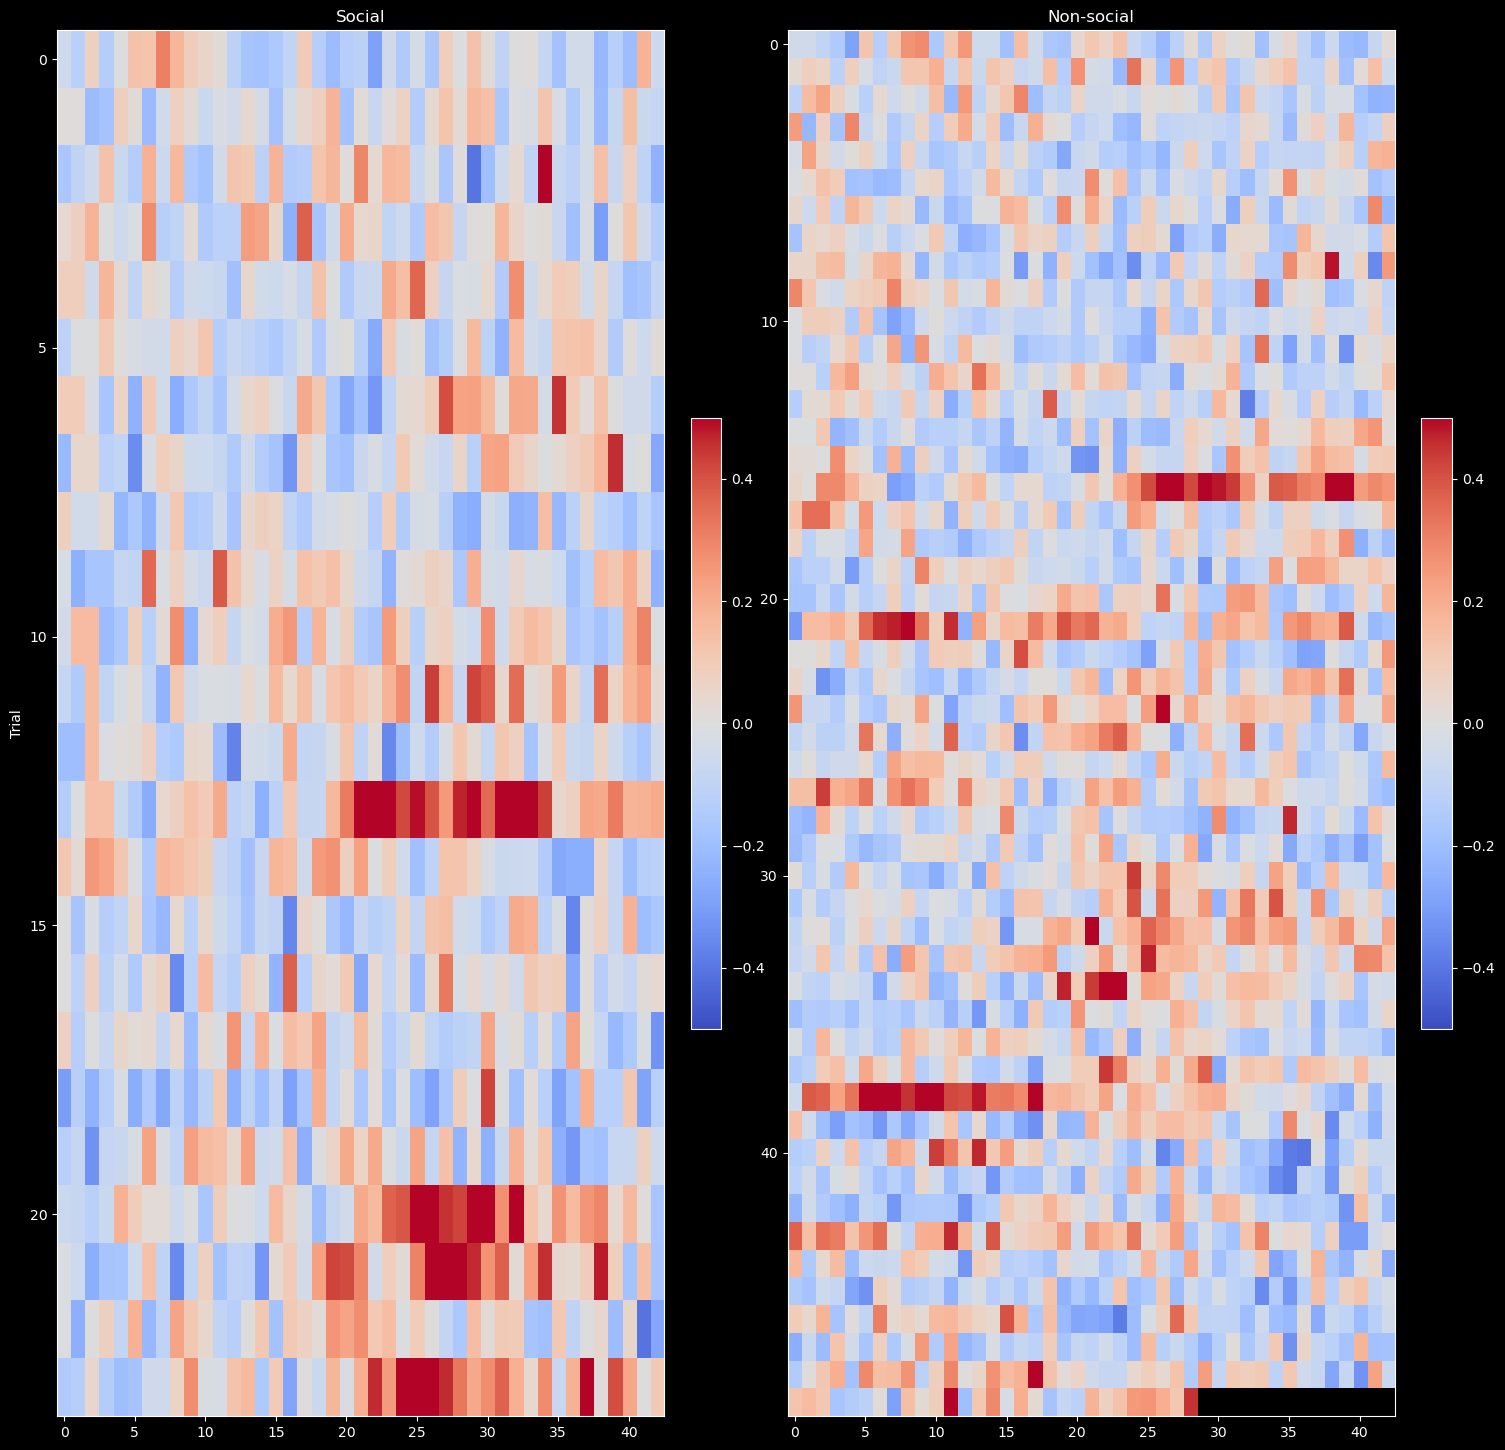

In [13]:
plot_data(normalized_data, social_index=0, non_social_index=1, fig_size=(18, 18), vmin=-0.5, vmax=0.5)

### Audio

In [14]:
data_dir = os.path.join(task_dir, 'Zion_video_audio_0220')
brain_filename = os.path.join(data_dir, 'Zion_MarmoAudio_0220_2Dscan_2_fus2D.source.nii')
event_filename = os.path.join(data_dir, 'mldata.mat')
task_type = 'audio'

brain_data, event_mat = load_data(data_dir, brain_filename, event_filename, task_type)
condition, behave_codes, absolute_starttime = extract_event_info(event_mat, task_type)
event_df = create_design_matrix(condition, behave_codes, absolute_starttime, task_type)
event_df2 = update_trial_type(event_df, task_type)

window_size = 225 
normalized_data_subtract, normalized_data_divide = apply_normalization(brain_data, window_size)

event_df3 = event_df2.dropna(subset=['onset'])

X = create_glm_design_matrix(brain_data, event_df3, tr=1/2.5, hrf_model='glover', drift_model='polynomial', drift_order=3)
contrast_results = run_glm_and_compute_contrasts(normalized_data_divide, X)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 153, 4500)


/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset, end
  warnings.warn(


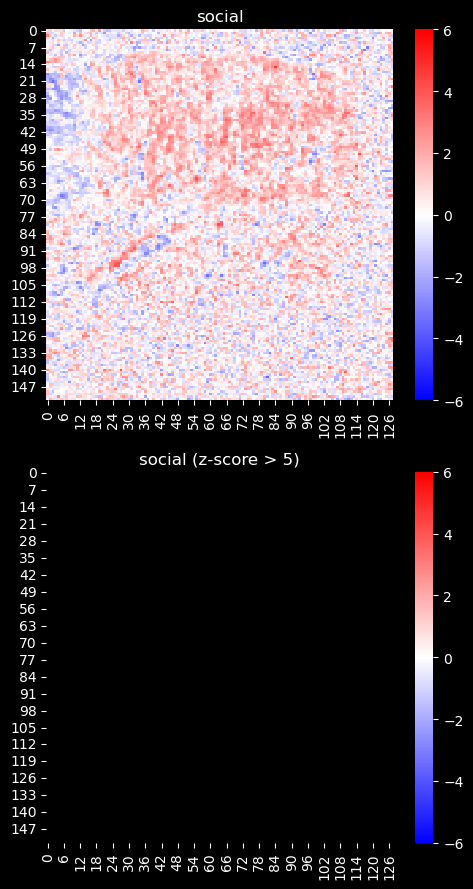

In [15]:
plot_contrast(contrast_results, contrast_name="social", shape=(128, 153), threshold=5, vmin=-6, vmax=6)

In [16]:
max_index, coordinates = get_max_index_and_coordinates(contrast_results['social'], (128, 153))
print("Maximum index:", max_index)
print("Coordinates (x, y):", coordinates)

# Calculate frame times
tr = 1 / 2.5
n_tr = brain_data.shape[-1]
frame_times = calculate_frame_times(n_tr, tr)

# Map events to frame times
event_df4, event_binary_df = map_events_to_frame_times(event_df3, frame_times)

j, i = coordinates
normalized_data = process_pixel_data(normalized_data_divide, i, j, event_df4, offset_start=-2, offset_end=15)
print(event_df4['trial_type'].unique())

Maximum index: 2004
Coordinates (x, y): (15, 84)
['non-social' 'social']


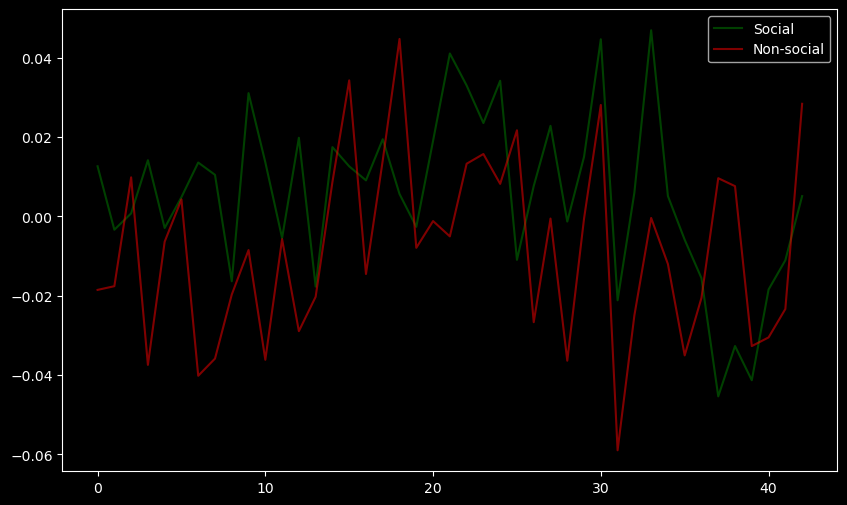

In [17]:
plot_normalized_data(normalized_data, social_index=1, non_social_index=0)

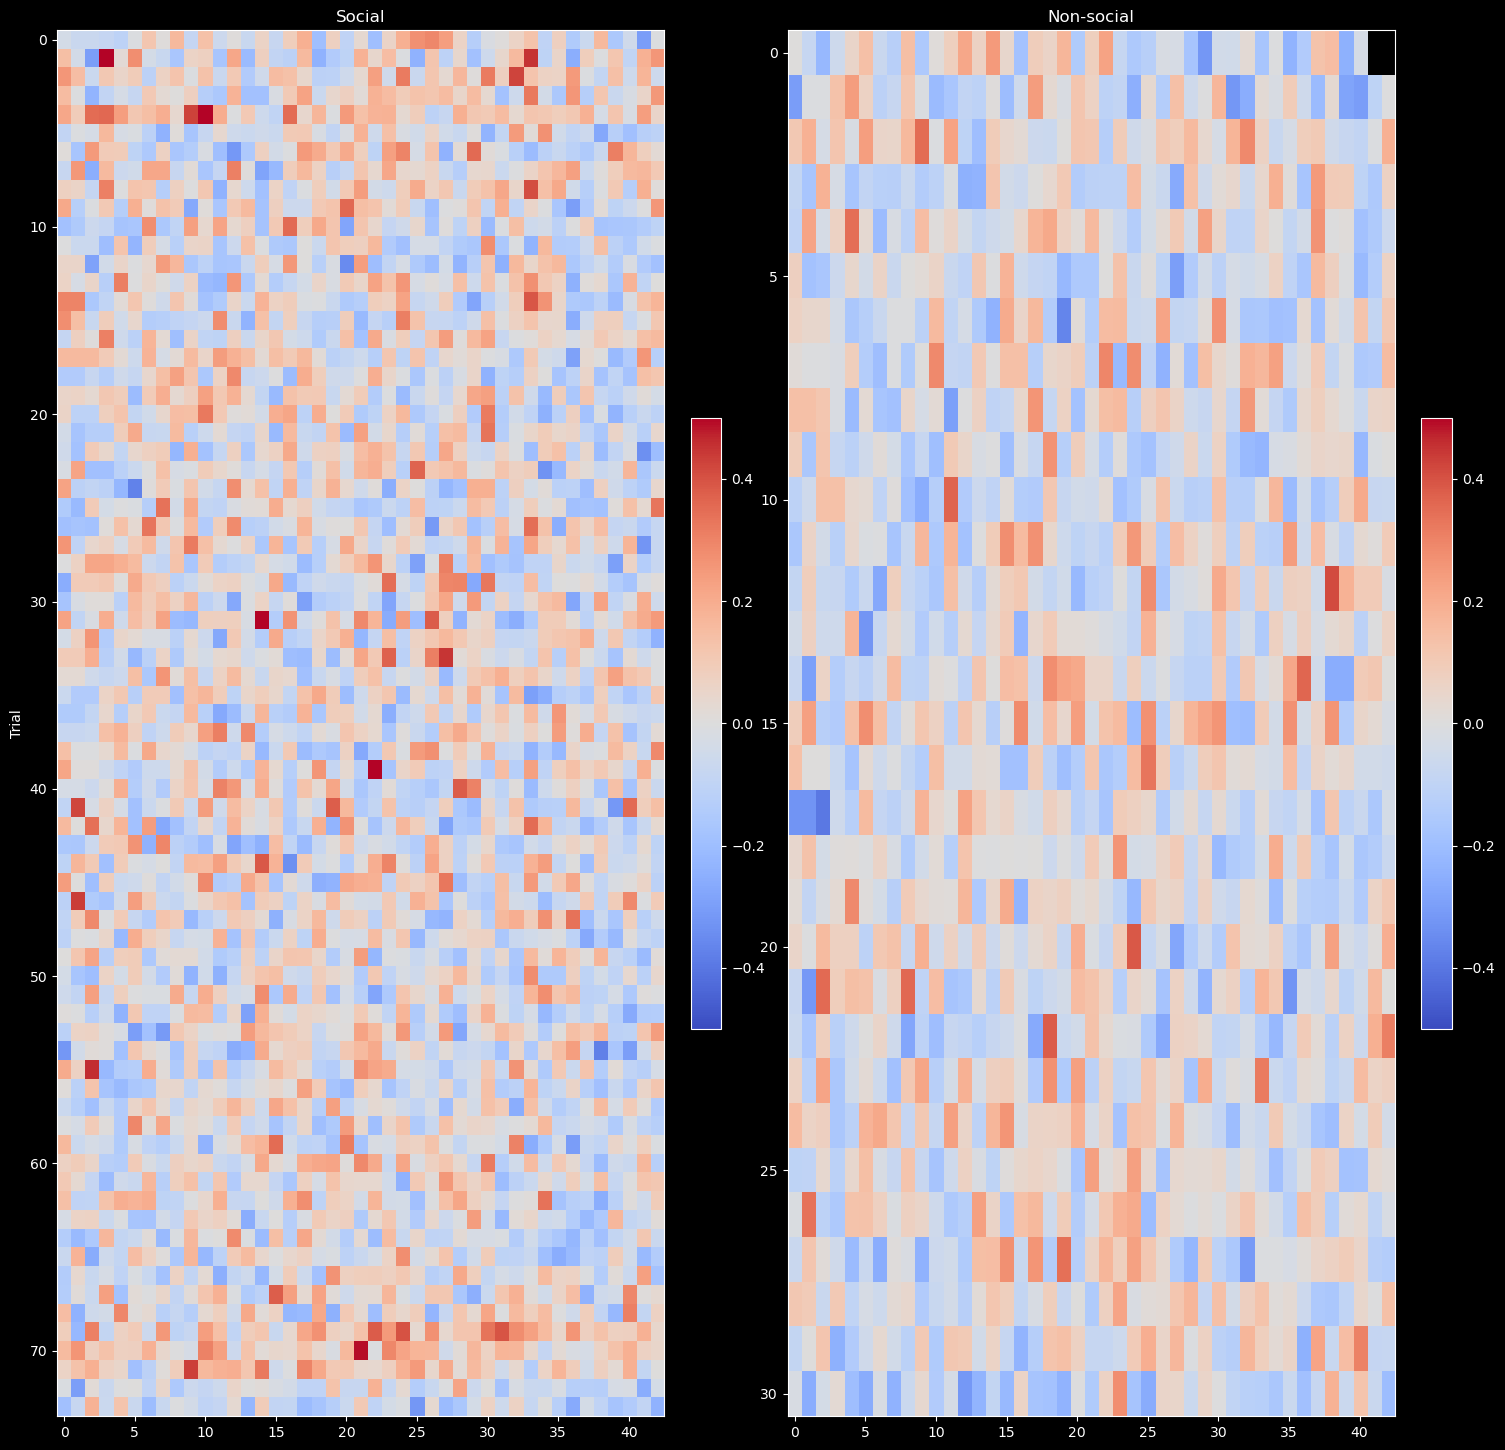

In [18]:
plot_data(normalized_data, social_index=1, non_social_index=0, fig_size=(18, 18), vmin=-0.5, vmax=0.5)

## Zion 0229

### Video

In [24]:
data_dir = os.path.join(task_dir, 'Zion_video_audio_0229')
brain_filename = os.path.join(data_dir, 'Zion__Social_video_0229_2.5Hz_2Dscan_1_fus2D.source.nii')
event_filename = os.path.join(data_dir, 'mldata.mat')
task_type = 'video'

brain_data, event_mat = load_data(data_dir, brain_filename, event_filename, task_type)
condition, behave_codes, absolute_starttime = extract_event_info(event_mat, task_type)
event_df = create_design_matrix(condition, behave_codes, absolute_starttime, task_type)
event_df2 = update_trial_type(event_df, task_type)

window_size = 225 
normalized_data_subtract, normalized_data_divide = apply_normalization(brain_data, window_size)

event_df3 = event_df2.dropna(subset=['onset'])

X = create_glm_design_matrix(normalized_data_divide, event_df3, tr=1/2.5, hrf_model='glover', drift_model='polynomial', drift_order=3)
contrast_results = run_glm_and_compute_contrasts(normalized_data_divide, X)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 153, 4500)


/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset, end
  warnings.warn(


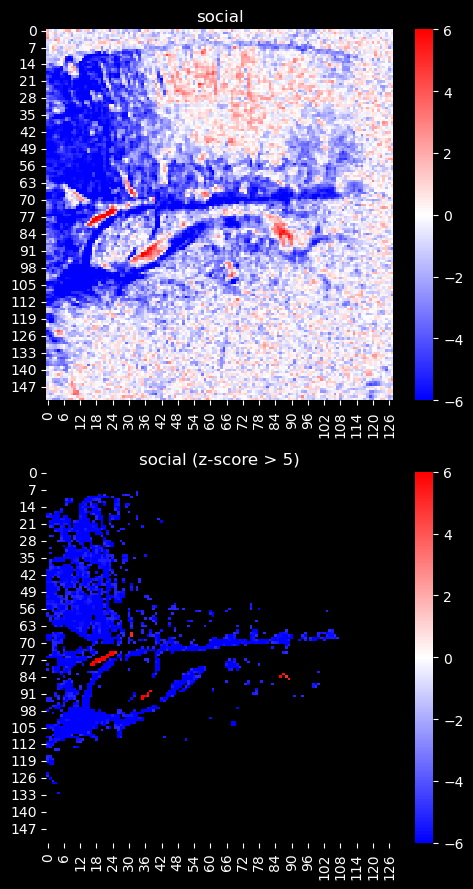

In [25]:
plot_contrast(contrast_results, contrast_name="social", shape=(128, 153), threshold=5, vmin=-6, vmax=6)

In [26]:
max_index, coordinates = get_max_index_and_coordinates(contrast_results['social'], (128, 153))
print("Maximum index:", max_index)
print("Coordinates (x, y):", coordinates)

# Calculate frame times
tr = 1 / 2.5
n_tr = brain_data.shape[-1]
frame_times = calculate_frame_times(n_tr, tr)

# Map events to frame times
event_df4, event_binary_df = map_events_to_frame_times(event_df3, frame_times)

j, i = coordinates
normalized_data = process_pixel_data(normalized_data_divide, i, j, event_df4, offset_start=-2, offset_end=15)
print(event_df4['trial_type'].unique())

Maximum index: 9876
Coordinates (x, y): (77, 20)
['non-social' 'social']


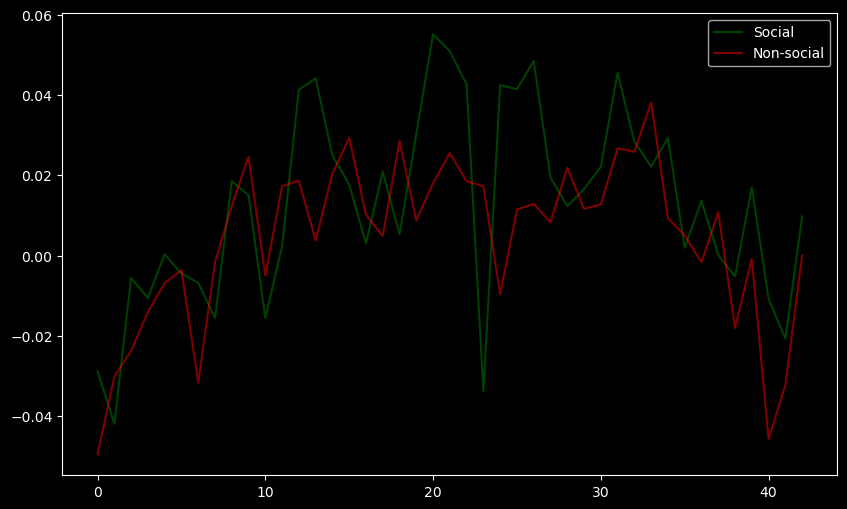

In [27]:
plot_normalized_data(normalized_data, social_index=1, non_social_index=0)

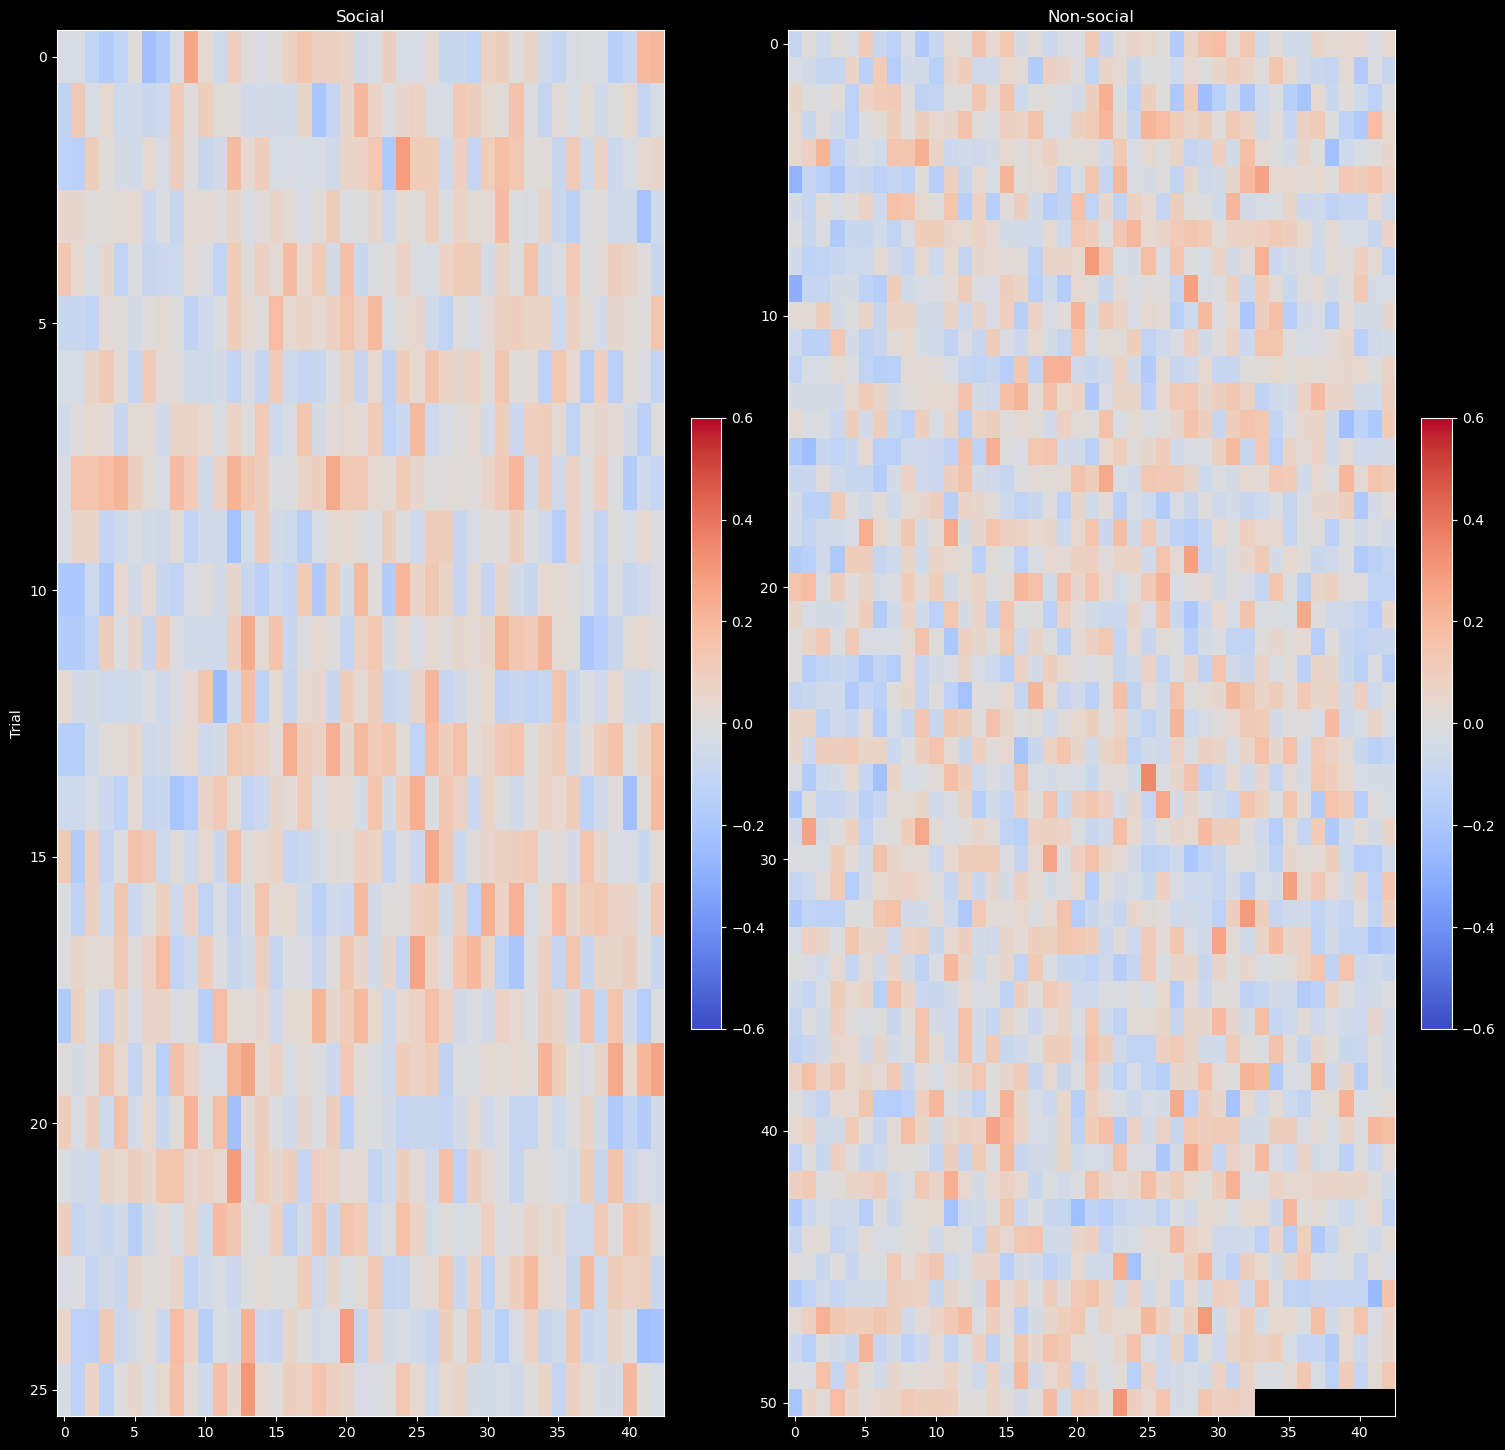

In [23]:
plot_data(normalized_data, social_index=1, non_social_index=0, fig_size=(18, 18), vmin=-0.6, vmax=0.6)

### Audio

In [28]:
data_dir = os.path.join(task_dir, 'Zion_video_audio_0229')
brain_filename = os.path.join(data_dir, 'Zion_Marmo_Audio_Chaoyi_0229_2.5Hz_2Dscan_2_fus2D.source.nii')
event_filename = os.path.join(data_dir, 'mldata.mat')
task_type = 'audio'

brain_data, event_mat = load_data(data_dir, brain_filename, event_filename, task_type)
condition, behave_codes, absolute_starttime = extract_event_info(event_mat, task_type)
event_df = create_design_matrix(condition, behave_codes, absolute_starttime, task_type)
event_df2 = update_trial_type(event_df, task_type)

window_size = 225 
normalized_data_subtract, normalized_data_divide = apply_normalization(brain_data, window_size)

event_df3 = event_df2.dropna(subset=['onset'])

X = create_glm_design_matrix(normalized_data_divide, event_df3, tr=1/2.5, hrf_model='glover', drift_model='polynomial', drift_order=3)
contrast_results = run_glm_and_compute_contrasts(normalized_data_divide, X)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 153, 4500)


/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset, end
  warnings.warn(


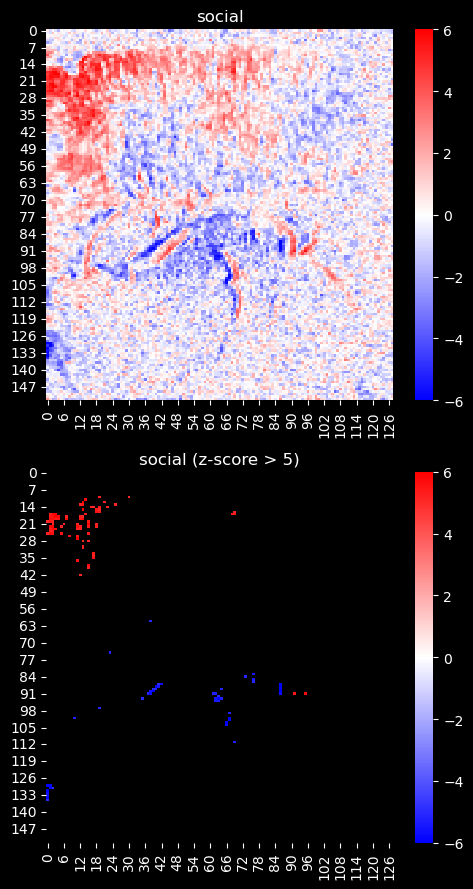

In [29]:
plot_contrast(contrast_results, contrast_name="social", shape=(128, 153), threshold=5, vmin=-6, vmax=6)

In [31]:
max_index, coordinates = get_max_index_and_coordinates(contrast_results['social'], (128, 153))
print("Maximum index:", max_index)
print("Coordinates (x, y):", coordinates)

# Calculate frame times
tr = 1 / 2.5
n_tr = brain_data.shape[-1]
frame_times = calculate_frame_times(n_tr, tr)

# Map events to frame times
event_df4, event_binary_df = map_events_to_frame_times(event_df3, frame_times)

j, i = coordinates
normalized_data = process_pixel_data(normalized_data_divide, i, j, event_df4, offset_start=-2, offset_end=15)
print(event_df4['trial_type'].unique())

Maximum index: 2179
Coordinates (x, y): (17, 3)
['social' 'non-social']


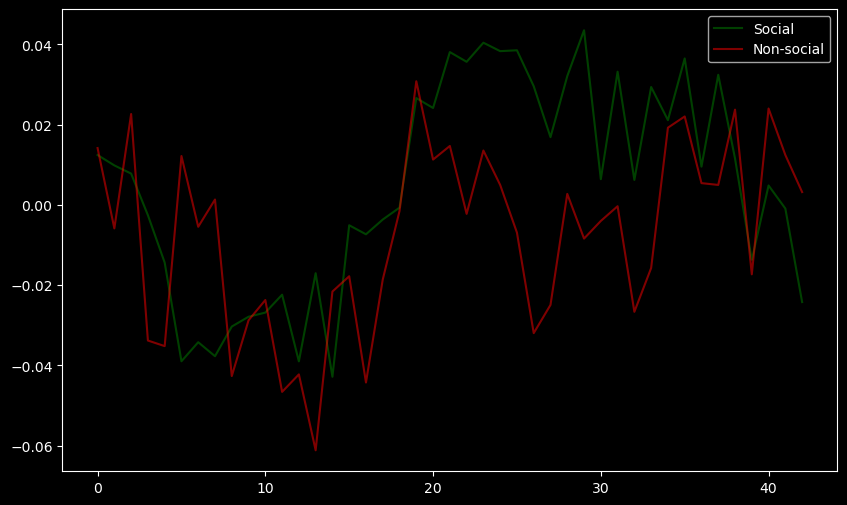

In [32]:
plot_normalized_data(normalized_data, social_index=0, non_social_index=1)

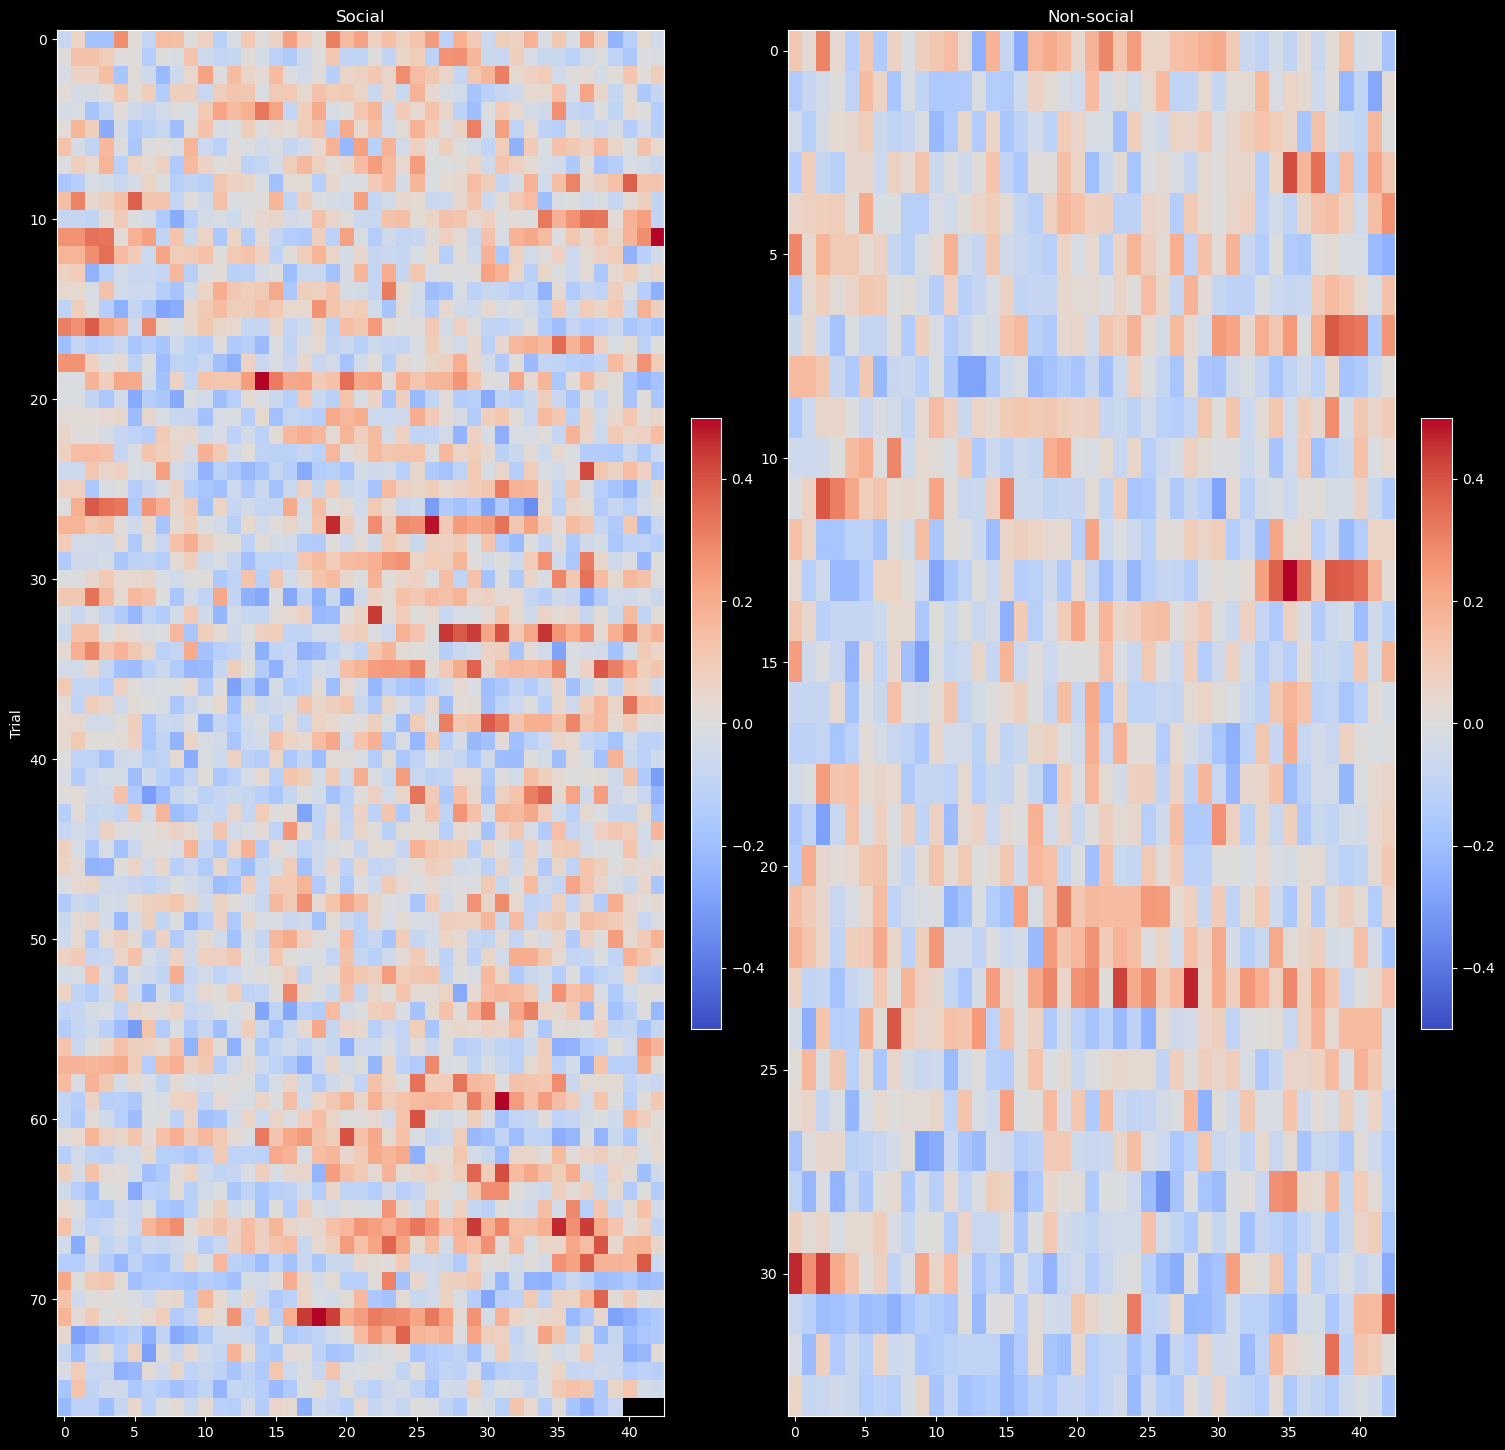

In [33]:
plot_data(normalized_data, social_index=0, non_social_index=1, fig_size=(18, 18), vmin=-0.5, vmax=0.5)

## Grouper 0227

### Video

In [34]:
data_dir = os.path.join(base_dir, 'task_data', 'Grouper_socialvideo_data')
brain_filename = os.path.join(data_dir, 'Grouper_0227_Social_Videos_New_2Dscan_1.nii')
event_filename = os.path.join(data_dir, 'mldata.mat')
task_type = 'video'

brain_data, event_mat = load_data(data_dir, brain_filename, event_filename, task_type)
condition, behave_codes, absolute_starttime = extract_event_info(event_mat, task_type)
event_df = create_design_matrix(condition, behave_codes, absolute_starttime, task_type)
event_df2 = update_trial_type(event_df, task_type)

window_size = 225 
normalized_data_subtract, normalized_data_divide = apply_normalization(brain_data, window_size)

event_df3 = event_df2.dropna(subset=['onset'])

X = create_glm_design_matrix(normalized_data_divide, event_df3, tr=1/2.5, hrf_model='glover', drift_model='polynomial', drift_order=3)
contrast_results = run_glm_and_compute_contrasts(normalized_data_divide, X)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 153, 4500)
Skipping index 32 due to b[0][0][1][2][0] != 2
Skipping index 43 due to b[0][0][1][2][0] != 2


/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset, end
  warnings.warn(


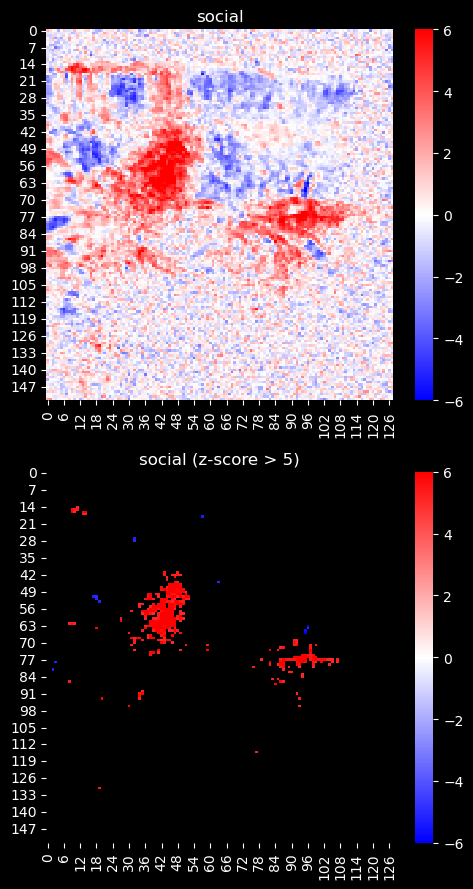

In [35]:
plot_contrast(contrast_results, contrast_name="social", shape=(128, 153), threshold=5, vmin=-6, vmax=6)

In [36]:
max_index, coordinates = get_max_index_and_coordinates(contrast_results['social'], (128, 153))
print("Maximum index:", max_index)
print("Coordinates (x, y):", coordinates)

# Calculate frame times
tr = 1 / 2.5
n_tr = brain_data.shape[-1]
frame_times = calculate_frame_times(n_tr, tr)

# Map events to frame times
event_df4, event_binary_df = map_events_to_frame_times(event_df3, frame_times)

j, i = coordinates
normalized_data = process_pixel_data(normalized_data_divide, i, j, event_df4, offset_start=-2, offset_end=15)
print(event_df4['trial_type'].unique())

Maximum index: 7723
Coordinates (x, y): (60, 43)
['non-social' 'social']


/Users/yibeichen/Documents/GitHub/fUSi-workflow/code/utils/psth.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_df['nearest_index_onset'] = onset_indices
/Users/yibeichen/Documents/GitHub/fUSi-workflow/code/utils/psth.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_df['nearest_index_end'] = end_indices


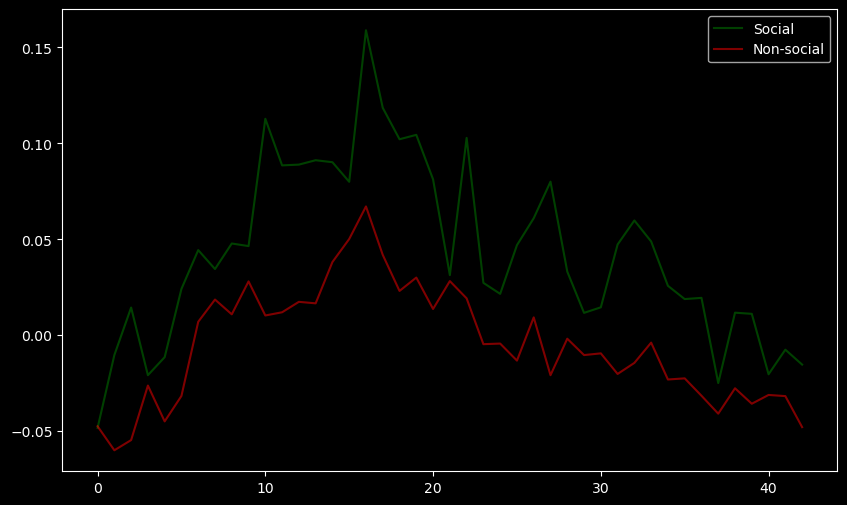

In [37]:
plot_normalized_data(normalized_data, social_index=1, non_social_index=0)

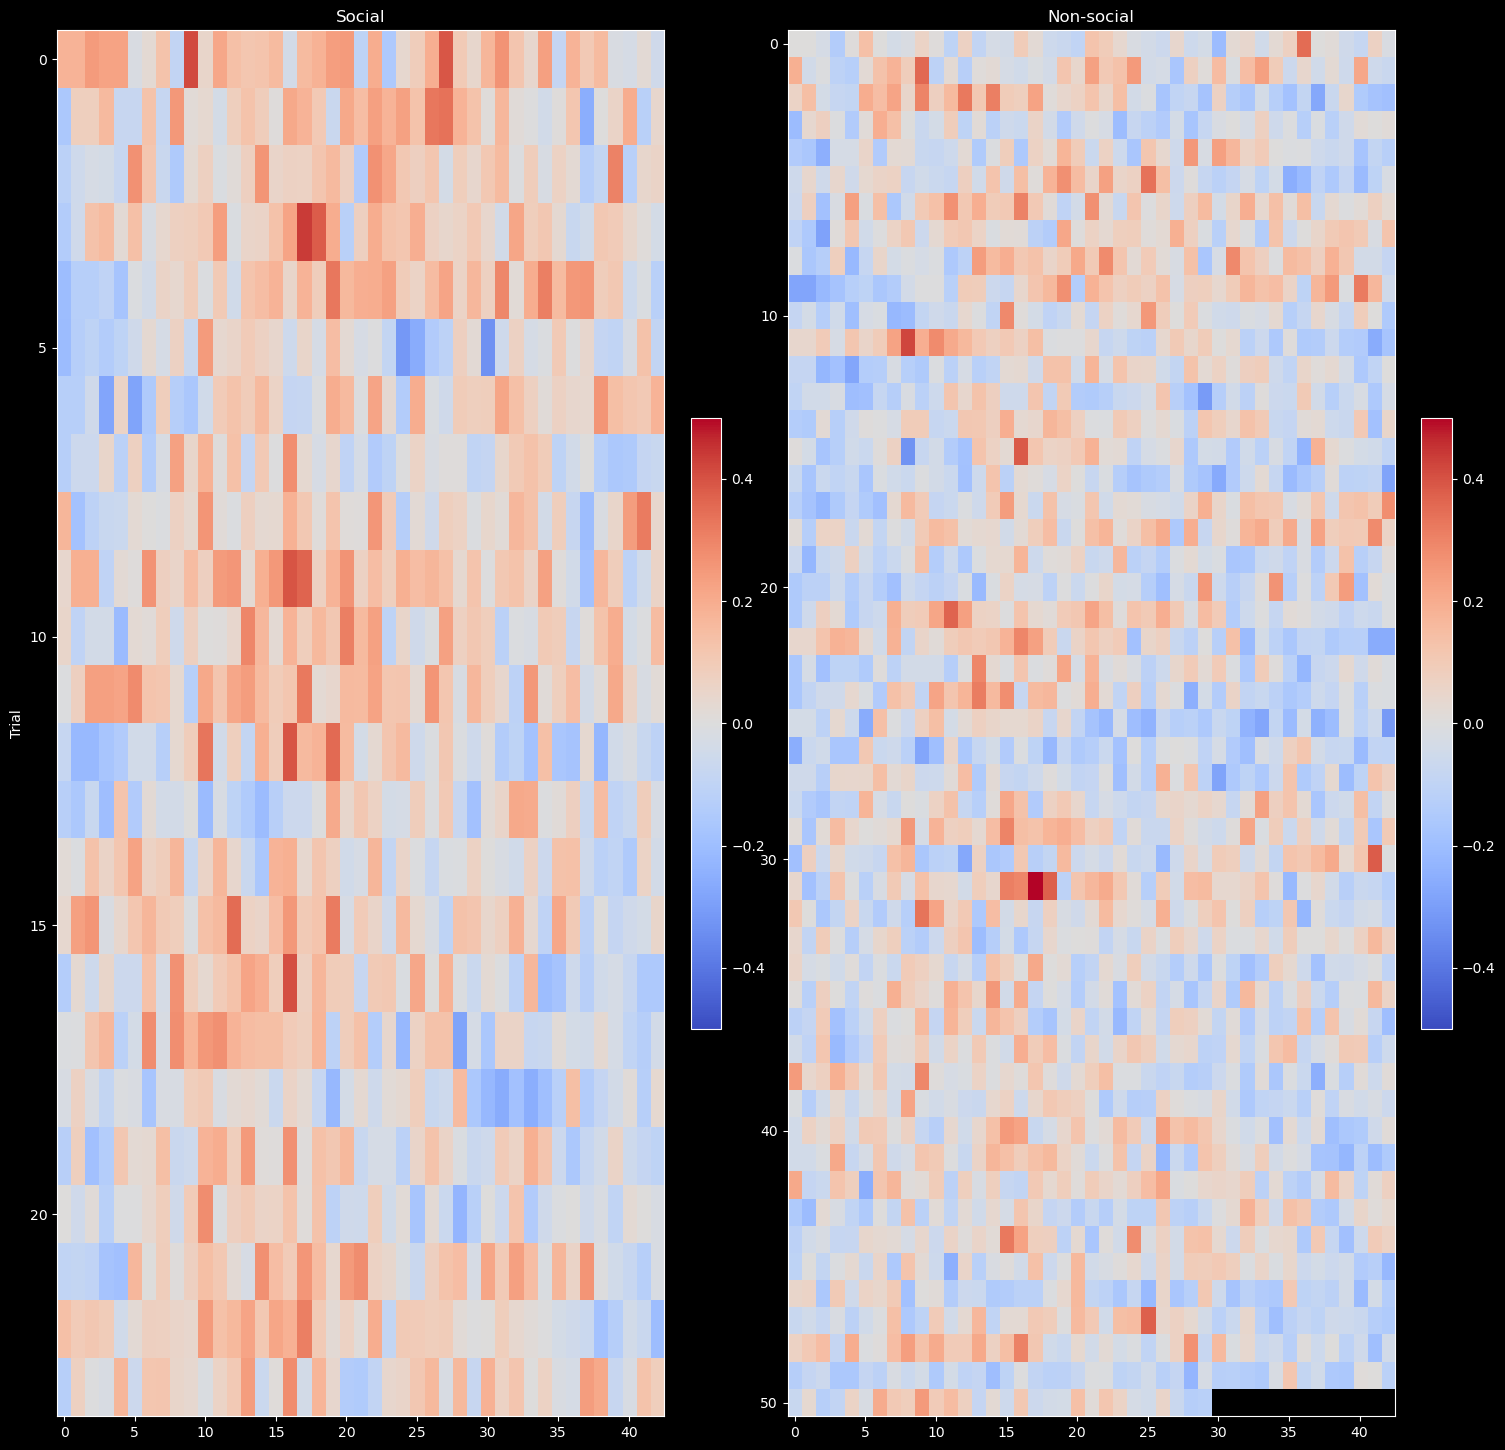

In [38]:
plot_data(normalized_data, social_index=1, non_social_index=0, fig_size=(18, 18), vmin=-0.5, vmax=0.5)

### Audio

In [39]:
data_dir = os.path.join(base_dir, 'task_data', 'Grouper_socialvideo_data')
brain_filename = os.path.join(data_dir, 'Grouper_Marmoaudio_0227_2Dscan_2.nii')
event_filename = os.path.join(data_dir, 'mldata.mat')
task_type = 'audio'

brain_data, event_mat = load_data(data_dir, brain_filename, event_filename, task_type)
condition, behave_codes, absolute_starttime = extract_event_info(event_mat, task_type)
event_df = create_design_matrix(condition, behave_codes, absolute_starttime, task_type)
event_df2 = update_trial_type(event_df, task_type)

window_size = 225 
normalized_data_subtract, normalized_data_divide = apply_normalization(brain_data, window_size)

event_df3 = event_df2.dropna(subset=['onset'])

X = create_glm_design_matrix(normalized_data_divide, event_df3, tr=1/2.5, hrf_model='glover', drift_model='polynomial', drift_order=3)
contrast_results = run_glm_and_compute_contrasts(normalized_data_divide, X)

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 153, 4500)


/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset, end
  warnings.warn(


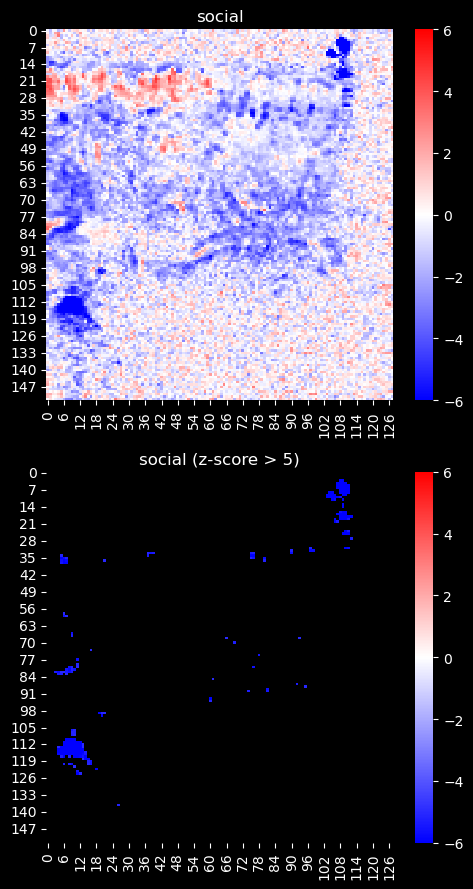

In [40]:
plot_contrast(contrast_results, contrast_name="social", shape=(128, 153), threshold=5, vmin=-6, vmax=6)

In [40]:
max_index, coordinates = get_max_index_and_coordinates(contrast_results['social'], (128, 153))
print("Maximum index:", max_index)
print("Coordinates (x, y):", coordinates)

# Calculate frame times
tr = 1 / 2.5
n_tr = brain_data.shape[-1]
frame_times = calculate_frame_times(n_tr, tr)

# Map events to frame times
event_df4, event_binary_df = map_events_to_frame_times(event_df3, frame_times)

j, i = coordinates
normalized_data = process_pixel_data(normalized_data_divide, i, j, event_df4, offset_start=-2, offset_end=15)
print(event_df4['trial_type'].unique())

Maximum index: 2600
Coordinates (x, y): (20, 40)
['social' 'non-social']


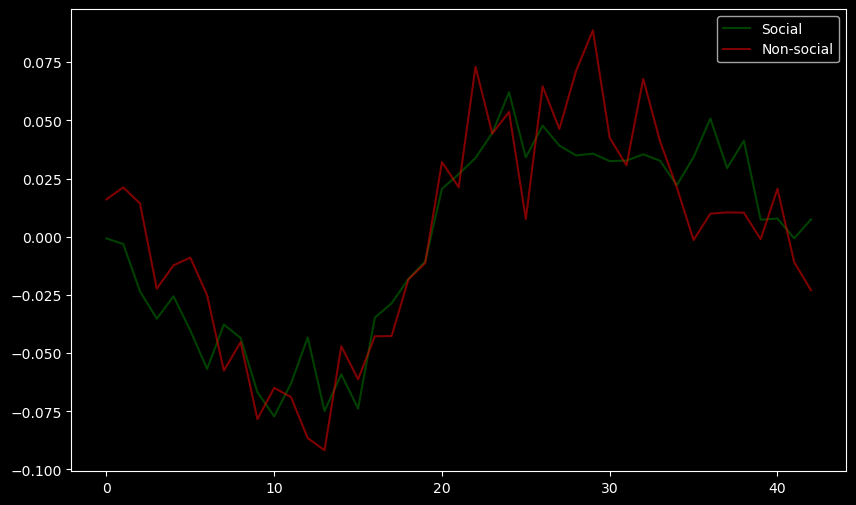

In [41]:
plot_normalized_data(normalized_data, social_index=0, non_social_index=1)

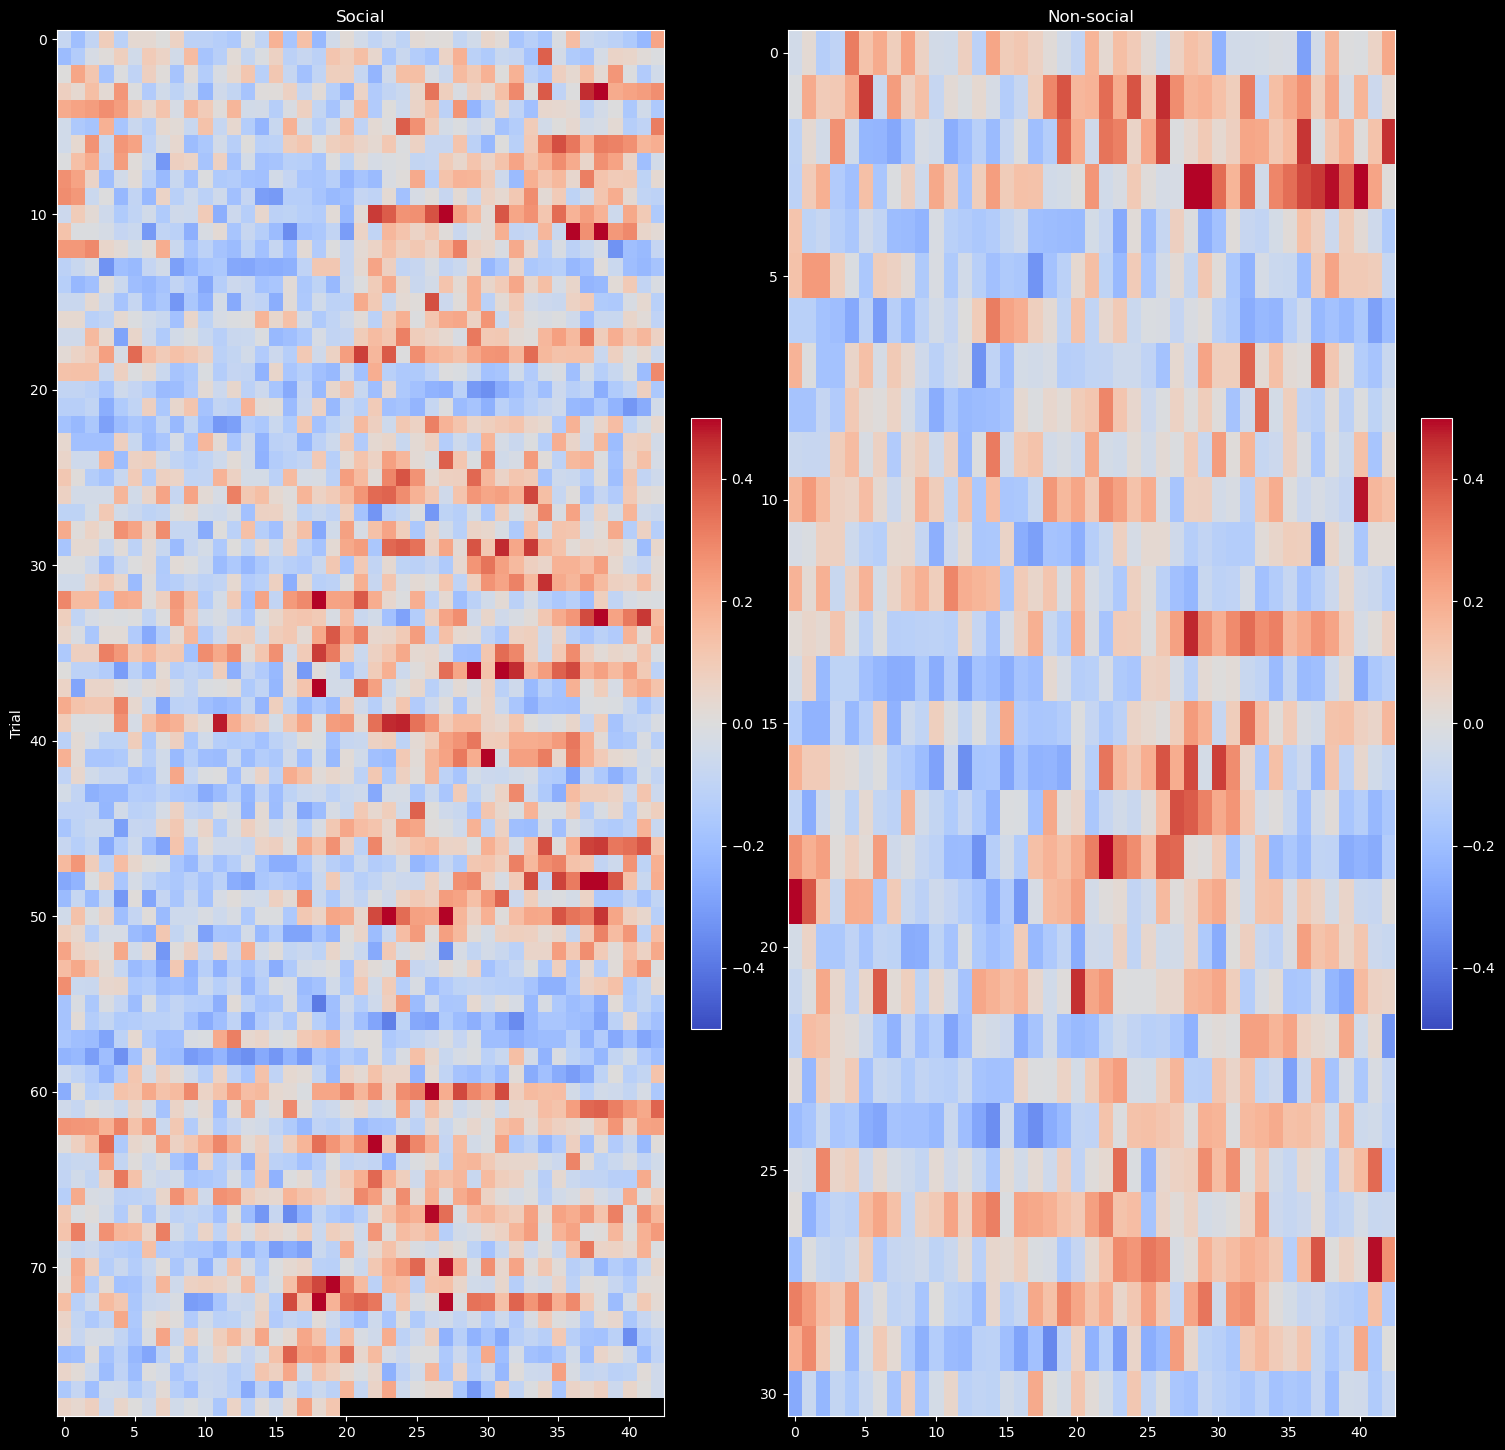

In [43]:
plot_data(normalized_data, social_index=0, non_social_index=1, fig_size=(18, 18), vmin=-0.5, vmax=0.5)

## Grouper 0603 8.5 Plane

In [71]:
from utils.preproc import load_data, extract_event_info, create_event_dataframe
from utils.glm import run_glm_analysis, compute_contrasts
from utils.psth import map_events_to_frame_times, process_activation

In [61]:
def plot_contrast(contrast_results, contrast_name, shape=(128, 153), threshold=3, vmin=-15, vmax=15):
    # Get the specific contrast result by key
    if contrast_name not in contrast_results:
        raise ValueError(f"Contrast '{contrast_name}' not found in contrast_results.")
    
    data = contrast_results[contrast_name].reshape(*shape)
    
    # Create a figure with 2 subplots arranged vertically
    fig, axes = plt.subplots(2, 1, figsize=(5, 9))
    
    # Plot the non-thresholded version
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    rotated_data = np.rot90(data)
    sns.heatmap(rotated_data, ax=axes[0], cmap="bwr", norm=norm, vmin=vmin, vmax=vmax)
    axes[0].set_title(f"{contrast_name}")
    
    # Apply threshold and plot the thresholded version
    if threshold is not None:
        data_thresholded = np.where((data >= threshold) | (data <= -threshold), data, np.nan)
        rotated_data_thresholded = np.rot90(data_thresholded)
        sns.heatmap(rotated_data_thresholded, mask=np.isnan(rotated_data_thresholded), ax=axes[1], cmap="bwr", norm=norm, vmin=vmin, vmax=vmax)
        axes[1].set_title(f"{contrast_name} (z-score > {threshold})")
    
    plt.tight_layout()
    plt.show()

In [62]:

data_dir = os.path.join(base_dir, 'task_data', 'Grouper_Audiocue_data', 'Grouper_0603_8.5')
brain_filename = 'Grouper_audiocue_060324_corrected3.nii.gz'
event_filename = 'mldata.mat'

brain_data, event_mat = load_data(data_dir, brain_filename, event_filename)
behave_codes, absolute_starttime = extract_event_info(event_mat, method='glm')
event_df = create_event_dataframe(behave_codes, absolute_starttime, method='glm')
window_size = 225 
normalized_data_subtract, normalized_data_divide = apply_normalization(brain_data, window_size)
labels, estimators, X = run_glm_analysis(normalized_data_divide, event_df)
contrast_results = compute_contrasts(labels, estimators, X)
# plot_contrasts(contrast_results, normalized_data_divide.shape)


Brain data shape: (128, 1, 143, 9000)


/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset
  warnings.warn(


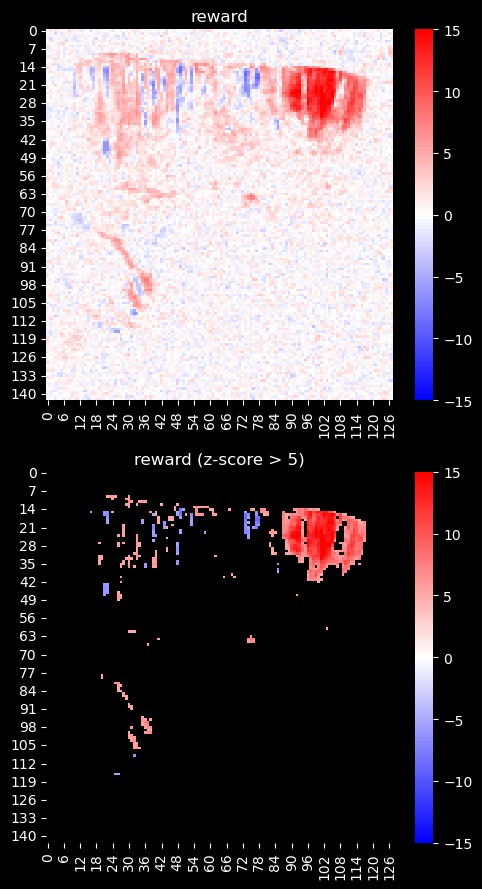

In [63]:
plot_contrast(contrast_results, contrast_name="reward", shape=(128, 143), threshold=5, vmin=-15, vmax=15)

In [74]:
brain_data, event_mat = load_data(data_dir, brain_filename, event_filename)
behave_codes, absolute_starttime = extract_event_info(event_mat, method='psth')
event_df = create_event_dataframe(behave_codes, absolute_starttime, method='psth')


tr = 1 / 2.5
n_tr = brain_data.shape[-1]
frame_times = np.arange(n_tr) * tr

event_df1, event_binary_df = map_events_to_frame_times(event_df, frame_times)

Brain data shape: (128, 1, 143, 9000)


In [90]:
# max_index, coordinates = get_max_index_and_coordinates(contrast_results['reward'], (143, 128))
# print("Maximum index:", max_index)
# print("Coordinates (x, y):", coordinates)

In [88]:
j, i = 108, 20
normalized_data = process_pixel_data(normalized_data_divide, i, j, event_df1, offset_start=-5, offset_end=15)
print(event_df1['trial_type'].unique())

['6' '5' '7']


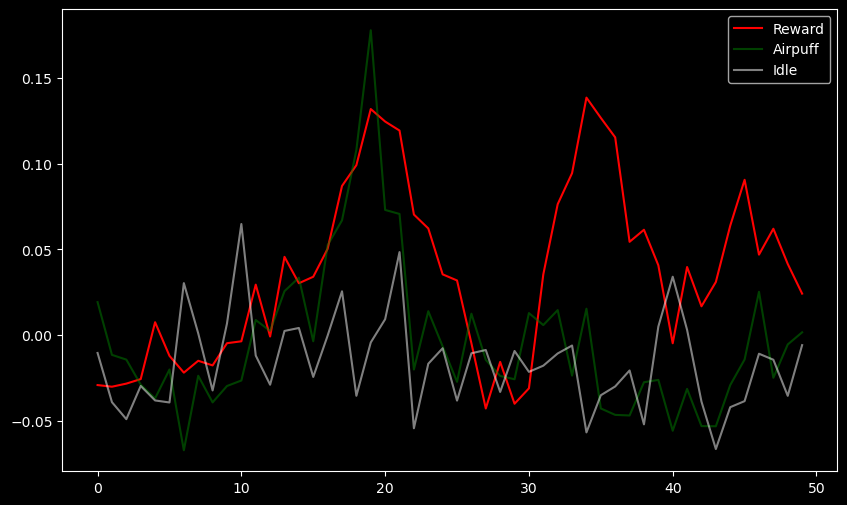

In [89]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the three lines
plt.plot(np.nanmean(normalized_data[1], axis=0), label='Reward', color='red')  
plt.plot(np.nanmean(normalized_data[0], axis=0), label='Airpuff', alpha=0.5, color='green') 
plt.plot(np.nanmean(normalized_data[2], axis=0), label='Idle', alpha=0.5, color='white') # Third line

# # Adding titles and labels
# plt.title('Three Lines in One Plot')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Show the plot
plt.show()

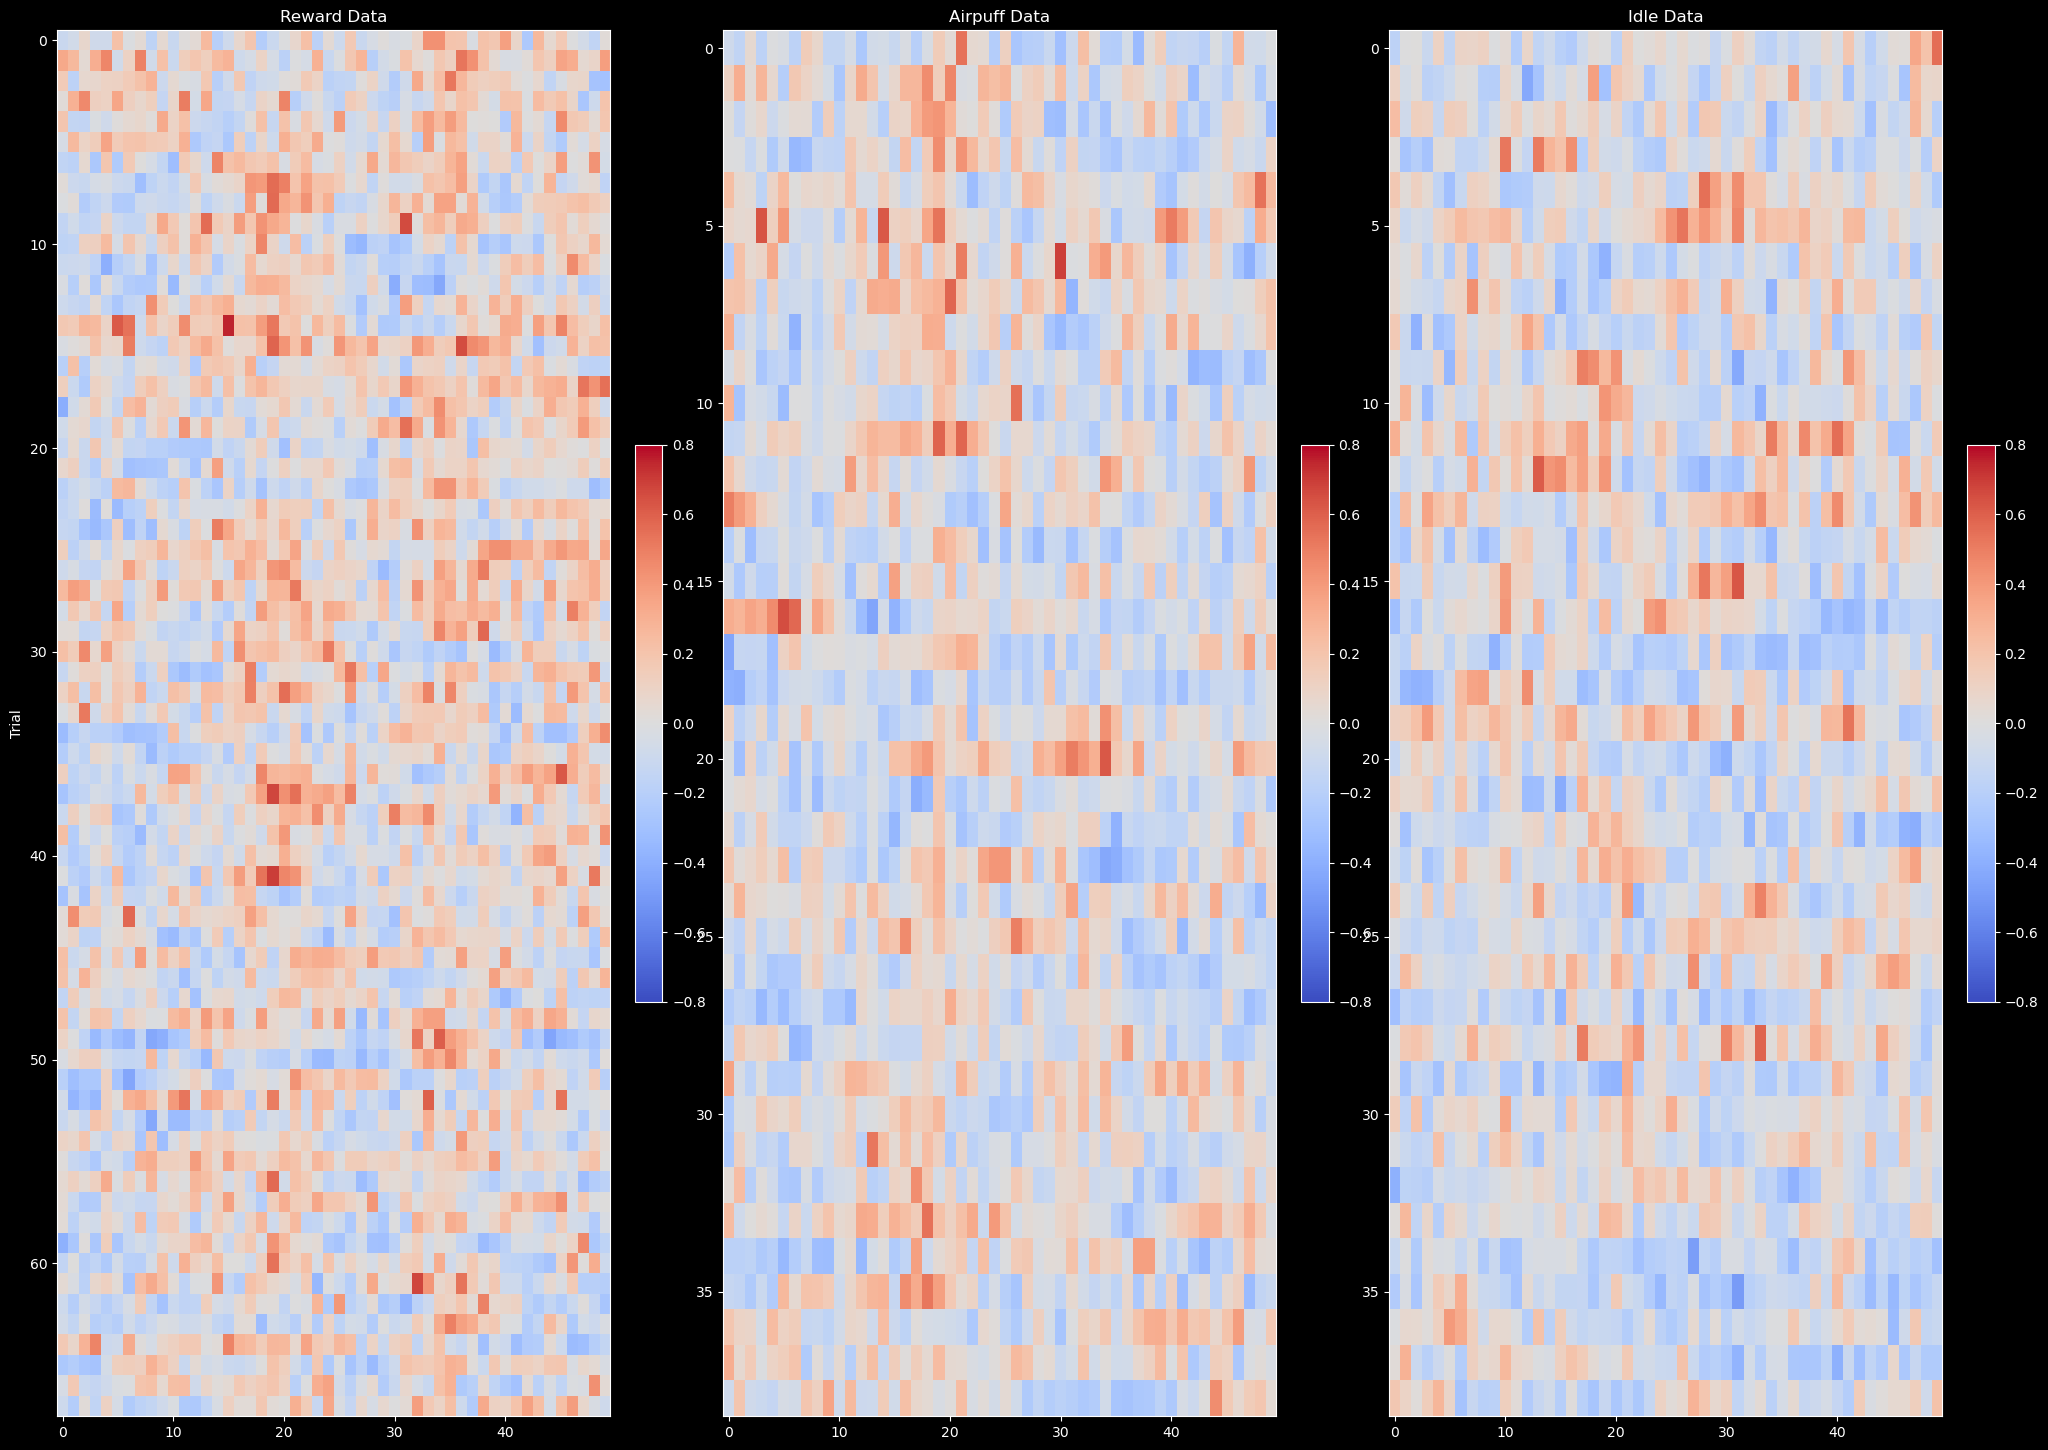

In [99]:
fig = plt.figure(figsize=(25, 18))  # Adjust the figure size to accommodate three plots

# Use GridSpec to control the layout
gs = GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.1)  # Three equal-width plots

min_val = -0.8
max_val = 0.8
# First plot (reward_data)
ax0 = fig.add_subplot(gs[0])
im0 = ax0.imshow(normalized_data[1], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax0.set_title('Reward Data')
ax0.set_ylabel('Trial')
# ax0.set_xticks([])  # Adjust or remove ticks as needed

# Second plot (airpuff_data)
ax1 = fig.add_subplot(gs[1])
im1 = ax1.imshow(normalized_data[0], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax1.set_title('Airpuff Data')
# ax1.set_xticks([])  # Adjust or remove ticks as needed
# ax1.set_yticks([])

# Third plot (idle_data)
ax2 = fig.add_subplot(gs[2])
im2 = ax2.imshow(normalized_data[2], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax2.set_title('Idle Data')
# ax2.set_xticks([])  # Adjust or remove ticks as needed
# ax2.set_yticks([])

# Add colorbars (optional)
plt.colorbar(im0, ax=ax0, fraction=0.046, pad=0.04)
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.show()